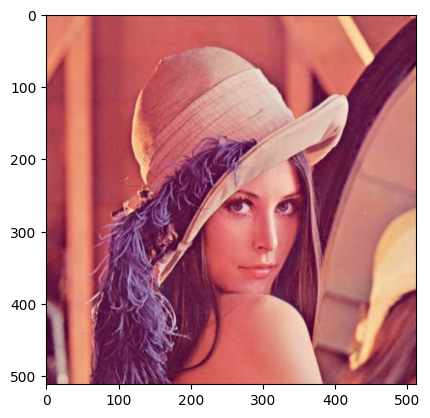

In [9]:
import  numpy as np
from enum import Enum
from matplotlib.image import imread
from matplotlib.pyplot import imshow
from matplotlib.image import imsave


img_arr = imread('lena.jpg')
imshow(img_arr)
class ColorModel(Enum):
    rgb = 0
    hsv = 1
    hsi = 2
    hsl = 3
    gray = 4  # obraz 2d

class BaseImage:
    data: np.ndarray  # tensor przechowujacy piksele obrazu
    color_model: ColorModel  # atrybut przechowujacy biezacy model barw obrazu

    def __init__(self, path: str) -> None:
        """
        inicjalizator wczytujacy obraz do atrybutu data na podstawie sciezki
        """
        self.data = imread(path)

        pass

    def save_img(self, path: str) -> None:
        """
        metoda zapisujaca obraz znajdujacy sie w atrybucie data do pliku
        """
        imsave('image.jpg', self.data)
        pass

    def show_img(self) -> None:
        """
        metoda wyswietlajaca obraz znajdujacy sie w atrybucie data
        """
        imshow(self.data)
        pass

    def get_layer(self, layer_id: int) -> 'Image':
        """
        metoda zwracajaca warstwe o wskazanym indeksie
        """
        if (layer_id == 0):
            return self.data[:, :, 0]
        elif (layer_id == 1):
            return self.data[:, :, 1]
        elif (layer_id == 2):
            return self.data[:, :, 2]
        else:
            return 'Błąd, argument może być tylko 0, 1 lub 2!'

        pass

    def get_img_layers(self) -> []:
        return np.squeeze(np.dsplit(self.data, self.data.shape[-1]))

    def to_hsv(self) -> 'Image':
        """
        metoda dokonujaca konwersji obrazu w atrybucie data do modelu hsv
        metoda zwraca nowy obiekt klasy image zawierajacy obraz w docelowym modelu barw
        """
        red, green, blue = self.get_img_layers() / 255.0
        M = np.max([red, green, blue], axis=0)
        m = np.min([red, green, blue], axis=0)
        V = M / 255
        S = np.where(M > 0, 1 - m / M, 0)
        additionMinusSubtraction = np.power(red, 2) + np.power(green, 2) + np.power(blue, 2) - red * green - red * blue - green * blue
        H = np.where(green >= blue, np.cos((red - green / 2.0 - blue / 2.0) / np.sqrt(additionMinusSubtraction)) ** (-1),
                     360 - np.cos((red - green / 2.0 - blue / 2.0) / np.sqrt(additionMinusSubtraction)) ** (-1))


        # return BaseImage(np.dstack((H, S, V)), ColorModel.hsv)
        imshow(self.data)


    def to_hsi(self) -> 'Image':
        """
        metoda dokonujaca konwersji obrazu w atrybucie data do modelu hsi
        metoda zwraca nowy obiekt klasy image zawierajacy obraz w docelowym modelu barw
        """
        red, green, blue = self.get_img_layers() / 255.0
        M = np.max([red, green, blue], axis=0)
        m = np.min([red, green, blue], axis=0)
        I = (red + green + blue) / 3.0
        S = np.where(M > 0, 1 - m / M, 0)
        additionMinusSubtraction = red ** 2 + green ** 2 + blue ** 2 - red * green - red * blue - green * blue
        H = np.where(green >= blue, np.cos((red - green / 2 - blue / 2) / np.sqrt(additionMinusSubtraction)) ** (-1),
                     360 - np.cos((red - green / 2 - blue / 2) / np.sqrt(additionMinusSubtraction)) ** (-1))
        return BaseImage(np.dstack((H, S, I)), ColorModel.hsi)
        pass

    def to_hsl(self) -> 'Image':
        """
        metoda dokonujaca konwersji obrazu w atrybucie data do modelu hsl
        metoda zwraca nowy obiekt klasy image zawierajacy obraz w docelowym modelu barw
        """
        red, green, blue = self.get_img_layers() / 255.0
        M = np.max([red, green, blue], axis=0)
        m = np.min([red, green, blue], axis=0)
        L = (0.5 * (M + m)) / 255
        d = (M - m) / 255
        S = np.where(L > 0, d / (1 - np.fabs(2 * L - 1)), 0)
        additionMinusSubtraction = np.power(red, 2) + np.power(green, 2) + np.power(blue, 2) - red * green - red * blue - green * blue
        H = np.where(green >= blue, np.cos((red - green / 2.0 - blue / 2.0) / np.sqrt(additionMinusSubtraction)) ** (-1),
                     360 - np.cos((red - green / 2.0 - blue / 2.0) / np.sqrt(additionMinusSubtraction)) ** (-1))
        return BaseImage(np.dstack((H, S, L)), ColorModel.hsl)
        pass

    def to_rgb(self) -> 'Image':
        """
        metoda dokonujaca konwersji obrazu w atrybucie data do modelu rgb
        metoda zwraca nowy obiekt klasy image zawierajacy obraz w docelowym modelu barw
        """
        pass


In [8]:
img = BaseImage("lena.jpg")
img.to_hsv()

TypeError: BaseImage.__init__() takes 2 positional arguments but 3 were given